Matthew Morgan
Student ID: 010471280
Data Mining II - 212
Task 3: Association Rules and Lift Analysis
Western Governor's University
Program Mentor: Mandy Rasmuson

Part I: Research Question

A.  Describe the purpose of this data mining report by doing the following:

A1.  Propose one question relevant to a real-world organizational situation that you will answer using market basket analysis.

The focus of my research for this project is if any prescribed medications are associated with the prescription of abilify. So my question is, what medications are strongly associated with patients who are prescribed Abilify?

A2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

While Market Basket Analysis is more focused on money making goals, the same technique can be used here to determine what common health conditions are possibly associated with those who are on Abilify. Hopefully, by using this analysis technique on this dataset we can determine what medications should be explored for patients who are prescribed Abilify.

Part II: Market Basket Justification

B.  Explain the reasons for using market basket analysis by doing the following:

B1.  Explain how market basket analyzes the selected dataset. Include expected outcomes.

Market Basket Analysis (MBA) is based on soemthing called "association rules." What MBA looks at is items that are associated with each other in individual transactions, and looking at the frequency in which they are purchased together. These relationships are then established as if-then relationships between the items. The first is called the antecedent and the second is called the consequent. (Jabeen, 2018)

As an example, Netflix, would be able to use this analysis to recommend something to watch based on what you watch frequently or have on your list. Amazon can use this to recommend additional purchases based on what you have in your cart. This information is all sourced from previous users of their platform and the tendencies of those items to be grouped together.

The expected outcome for this analysis is to find what other medications that patients who are prescribed Abilify are also prescribed. Abilify is used for a number of conditions such as schizophrenia, bipolar disorder, depression, Tourette syndrome, and irritiability associated with autism. (Aripiprazole: MedlinePlus Drug Information, n.d.) If we can identify other medications that are prescribed alongside Abilify that gives us tools needed to identify patients who are prescribed those other medications and could possibly be helped by Abilify.

B2.  Provide one example of transactions in the dataset.
Example below

In [131]:
# Analytics and Data Packages
import pandas as pd
import numpy as np
 
# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Market Basket Analysis Packages
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

#Loading the CSV of the default dataset
df = pd.read_csv(r'C:\Users\mmorg\WGU\D212\Task 3\medical_market_basket.csv')

df.iloc[37]

Presc01                   paroxetine
Presc02       isosorbide mononitrate
Presc03       amphetamine salt combo
Presc04                   carvedilol
Presc05                      abilify
Presc06                 azithromycin
Presc07               spironolactone
Presc08    amphetamine salt combo xr
Presc09                  clopidogrel
Presc10                   Duloxetine
Presc11                          NaN
Presc12                          NaN
Presc13                          NaN
Presc14                          NaN
Presc15                          NaN
Presc16                          NaN
Presc17                          NaN
Presc18                          NaN
Presc19                          NaN
Presc20                          NaN
Name: 37, dtype: object

B3.  Summarize one assumption of market basket analysis.

One assumption of MBA is that all the items in a single transaction have a relationship. As stated earlier, MBA exists to establish a sort of if-then relationship. So the assumption through MBA is that if customer purchases item A, then they will also likely purchase item B because of established relationship. 

By using MBA we can explore large amounts of data and find relationships between items that might not be obvious. 

Part III: Data Preparation and Analysis

C.  Prepare and perform market basket analysis by doing the following:

C1.  Transform the dataset to make it suitable for market basket analysis. Include a copy of the cleaned dataset.

In [132]:
#Get overiew of dataset such as # of columns, names, and size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [133]:
#Checking for dataset size
df.shape

(15002, 20)

In [134]:
# More exploration to spot any potential problems with the dataset and what might need cleaned up
pd.set_option("display.max_columns", None)
df.head(20)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\mmorg\anaconda3\lib\site-packages\missingno\missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
C:\Users\mmorg\anaconda3\lib\site-packages\missingno\missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


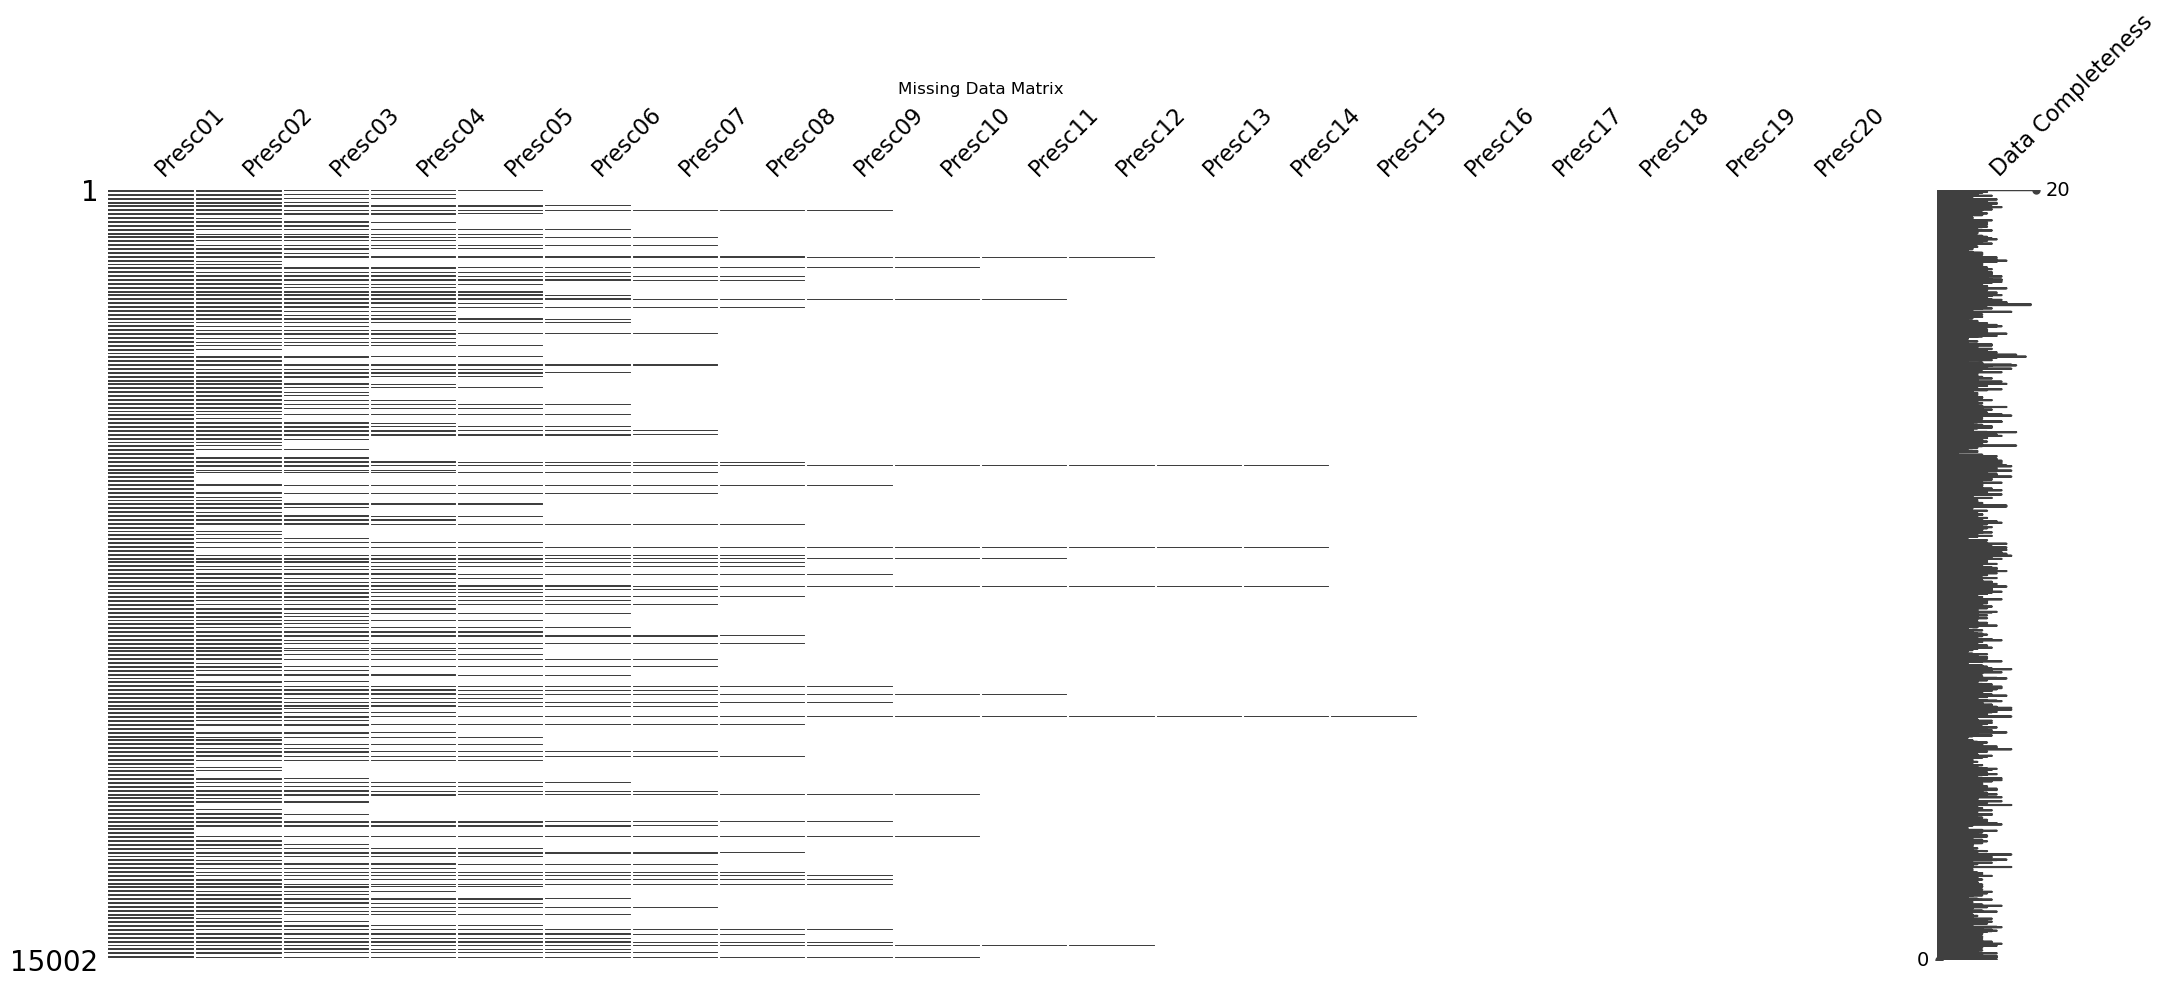

In [135]:
#Missing data matrix showing where null values exist
msno.matrix(df, labels=True)
plt.title('Missing Data Matrix')
plt.show()

In [136]:
# There are 15,002 rows when I'm only supposed to have 7,501. Every other row is NaN and can be dropped.
df = df[df['Presc01'].notna()]
# Need to reset the index to clean up our DataFrame
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [137]:
# Verify correct amount of rows
df.shape

(7501, 20)

In [138]:
# Verify that DataFrame looks good
df.head(8)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
1,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,cialis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,hydrochlorothiazide,glyburide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,metformin,salmeterol inhaler,sertraline HCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Create list of lists
trans = []
for row in range(len(df)):
    trans.append([str(df.values[row, cell]) for cell in range(0, 20)])

In [140]:
# Verify new list
print(trans[0])

['amlodipine', 'albuterol aerosol', 'allopurinol', 'pantoprazole', 'lorazepam', 'omeprazole', 'mometasone', 'fluconozole', 'gabapentin', 'pravastatin', 'cialis', 'losartan', 'metoprolol succinate XL', 'sulfamethoxazole', 'abilify', 'spironolactone', 'albuterol HFA', 'levofloxacin', 'promethazine', 'glipizide']


In [141]:
# Verify new list
print(trans[1])

['citalopram', 'benicar', 'amphetamine salt combo xr', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


In [143]:
# Instantiate encoder
encoder = TransactionEncoder().fit(trans)
# Fit to trans
array = encoder.transform(trans)
# Create new DataFrame
mba_df = pd.DataFrame(array, columns=encoder.columns_)
# Inspect mba_df
mba_df

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,nan,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [144]:
# Drop nan column as it's not needed
mba_df = mba_df.drop(columns='nan')

In [145]:
# Verify column has been dropped
mba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 119 entries, Duloxetine to zolpidem
dtypes: bool(119)
memory usage: 871.8 KB


In [146]:
# Verify column has been dropped
mba_df

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [147]:
# Provide a copy of the cleaned Data Set, index=False prevents the creation of an additional column
mba_df.to_csv(r'C:\Users\mmorg\WGU\D212\Task 3\clean_mba_data.csv', index=False)

C2.  Execute the code used to generate association rules with the Apriori algorithm. Provide screenshots that demonstrate the error-free functionality of the code.

In [148]:
# Use apriori algorithm to generate itemsets
a_rules = apriori(mba_df, min_support=0.05, use_colnames = True)
a_rules

,support,itemsets
0,0.238368,(abilify)
1,0.079323,(alprazolam)
2,0.071457,(amlodipine)
3,0.068391,(amphetamine salt combo)
4,0.179709,(amphetamine salt combo xr)
5,0.129583,(atorvastatin)
6,0.174110,(carvedilol)
7,0.076523,(cialis)
8,0.087188,(citalopram)
9,0.059992,(clopidogrel)


In [149]:
# Use association_rules with a lift of "1" minimum (more likely to get consequent)
ass_r = association_rules(a_rules, metric = 'lift', min_threshold=1.0)
ass_r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
1,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
2,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
4,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
5,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


In [150]:
ass_r.sort_values(by=['lift'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
4,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
5,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
0,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
1,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562


C3.  Provide values for the support, lift, and confidence of the association rules table.

In [ ]:
Refer to C2

C4.  Identify the top three rules generated by the Apriori algorithm. Include a screenshot of the top rules along with their summaries.

In [151]:
top_3 = ass_r[ (ass_r['lift'] >= 1.3) & 
               (ass_r['confidence'] >= 0.25 ) ].sort_values(by=['lift'], ascending = False)
top_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
4,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


Part IV: Data Summary and Implications

D.  Summarize your data analysis by doing the following:

In [152]:
ass_r.antecedents.value_counts()

(abilify)                      3
(amphetamine salt combo xr)    1
(carvedilol)                   1
(diazepam)                     1
Name: antecedents, dtype: int64

In [153]:
ass_r.consequents.value_counts()

(abilify)                      3
(amphetamine salt combo xr)    1
(carvedilol)                   1
(diazepam)                     1
Name: consequents, dtype: int64

D1.  Summarize the significance of support, lift, and confidence from the results of the analysis.

By looking at the count of antecedents and consequents in the final results we can see that Abilify is commonly prescribed with 3 other medications; Amphetamine Salt Combo XR, Carvedilol, and Diazepam. Before dicussing this further I will address the rubric in regards to support, life, and confidence of these relationships. In this summary I will focus on our top 3 rules, Abilify and Carvedilol, and Diazepam and Abilify,

Support refers to the proportion of transactions containing the rule. Our Abilify and Carvedilol support is 0.0597 which translates to 6% of all transactions containing this pair. For Diazepam and Abilify our support is 0.0526 which translates to this pair appearing in 5.3% of all transactions.

Lift being greater than 1 is indicative of there being a positive relationship between the antecedents and consequents. Lift being 1.44 and 1.35 for our two rules lends support that there is a positive relationship between the two. 1.00 would tell us that there is no relationship.

Confidence is a calculation of the proportion of all transactions containing the rule divided by the proportion of transactions containing only the antecedent. In this case Carvedilol and then Abilify is more common than Abilify and then Carvedilol.

Taking this into account, it looks like Abilify is commonly prescribed after having prescribed Carvedilol and Diazepam. Carvedilol is a beta blocker and is used to treat high blood pressure and heart failure (Carvedilol: MedlinePlus Drug Information, n.d.) while Diazepam is commonly used to treat anxiety, muscle spasms, and seizures. (Diazepam: MedlinePlus Drug Information, n.d.)

D2.  Discuss the practical significance of the findings from the analysis.

As stated earlier, Abilify has a wide range of use cases such as schizophrenia, bipolar disorder, depression, Tourette syndrome, and irritiability associated with autism. Looking at the big picture here we could see someone being treated with Carvedilol or Diazepam as someone who might be suffering from depression due to the health coniditions associated with those medications. The practical significance here is to start looking at patients who are on medications in the same class as Carvedilol and Diazepam and screen for conditions that would be associated with Abilify. 

D3.  Recommend a course of action for the real-world organizational situation from part A1 based on your results from part D1.
 
The established relationship of prescribing Abilify after prescribing Diazepam or Carvedilol should cause us to start looking at our patients more in-depth. Patients who are taking medications that fall into the same class as Diazepam and Carvedilol should be more aggresively screened for depression or other conditions that Abilify is prescribed for. There is a strong correlation that these patients require this pair of medications and we should use that to inform our future processes.

Part V: Attachments

E.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=de963dc3-621f-4c90-a6d8-b02b001f7ce1

F.  Record all web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.

I used code from the DataCamp D212 - Data Mining II track as well as the webinar recording from Dr. Kesselly

G.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
 
Jabeen, H. (2018). Market Basket Analysis using R. https://www.datacamp.com/tutorial/market-basket-analysis-r

Aripiprazole: MedlinePlus Drug Information. (n.d.). https://medlineplus.gov/druginfo/meds/a603012.html

Carvedilol: MedlinePlus Drug Information. (n.d.). https://medlineplus.gov/druginfo/meds/a697042.html

Diazepam: MedlinePlus Drug Information. (n.d.). https://medlineplus.gov/druginfo/meds/a682047.html